In [ ]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from tensorflow import keras
import matplotlib.pyplot as plt

In [ ]:

#Download the dataset from gDrive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
zip_file = '/content/drive/Shareddrives/Capstone Project/ML/Data/dataset6.zip'
zip_ref   = zipfile.ZipFile(zip_file, 'r')
zip_ref.extractall('/content/drive/Shareddrives/Capstone Project/ML/Data/')
zip_ref.close()

In [ ]:
source = '/content/drive/Shareddrives/Capstone Project/ML/Data/dataset6/'
sourceAcnes = os.path.join(source, 'acnes')
sourceBlackheads = os.path.join(source, 'blackheads')
sourceDarkSpots = os.path.join(source, 'darkspots')
sourceWrinkles = os.path.join(source, 'wrinkles')

print(f"There are {len(os.listdir(sourceAcnes))} images of acnes.")
print(f"There are {len(os.listdir(sourceBlackheads))} images of blackheads.")
print(f"There are {len(os.listdir(sourceDarkSpots))} images of darkspots.")
print(f"There are {len(os.listdir(sourceWrinkles))} images of wrinkles.")

There are 250 images of acnes.
There are 250 images of blackheads.
There are 250 images of darkspots.
There are 250 images of wrinkles.


In [ ]:
import os
import shutil

# Define root directory
root_dir = '/content/drive/Shareddrives/Capstone Project/skin-case/'

# Empty directory to prevent FileExistsError if the function is run several times
if os.path.exists(root_dir):
    shutil.rmtree(root_dir)

# Create train and validation directories
def create_train_val_dirs(root_path):
    # train and validation directories for skin-case
    train_dir = os.path.join(root_dir, 'training')
    os.makedirs(train_dir, exist_ok=True)
    val_dir = os.path.join(root_dir, 'validation')
    os.makedirs(val_dir, exist_ok=True)

    # train directories for acnes
    train_acnes_dir = os.path.join(train_dir, 'acnes')
    os.makedirs(train_acnes_dir, exist_ok=True)
    # train directories for blackheads
    train_blackheads_dir = os.path.join(train_dir, 'blackheads')
    os.makedirs(train_blackheads_dir, exist_ok=True)
    # train directories for darkspots
    train_darkspots_dir = os.path.join(train_dir, 'darkspots')
    os.makedirs(train_darkspots_dir, exist_ok=True)
    # train directories for wrinkles
    train_wrinkles_dir = os.path.join(train_dir, 'wrinkles')
    os.makedirs(train_wrinkles_dir, exist_ok=True)

    # validation directories for acnes
    val_acnes_dir = os.path.join(val_dir, 'acnes')
    os.makedirs(val_acnes_dir, exist_ok=True)
    # validation directories for blackheads
    val_blackheads_dir = os.path.join(val_dir, 'blackheads')
    os.makedirs(val_blackheads_dir, exist_ok=True)
    # validation directories for darkspots
    val_darkspots_dir = os.path.join(val_dir, 'darkspots')
    os.makedirs(val_darkspots_dir, exist_ok=True)
    # validation directories for wrinkles
    val_wrinkles_dir = os.path.join(val_dir, 'wrinkles')
    os.makedirs(val_wrinkles_dir, exist_ok=True)

try:
    create_train_val_dirs(root_path=root_dir)
except FileExistsError:
    print("You should not be seeing this since the upper directory is removed beforehand")

# Print all directories
#for rootdir, dirs, files in os.walk(root_dir):
#    for subdir in dirs:
#        print(os.path.join(rootdir, subdir))

In [ ]:
def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):
  files = []
  for filename in os.listdir(SOURCE_DIR):
    file = SOURCE_DIR + filename
    if os.path.getsize(file) > 0:
      files.append(filename)
    else:
      print(filename + ' is zero length, so ignoring.')

    all_files = len(files)
    train_length = int(all_files * SPLIT_SIZE)
    test_length = int(all_files - train_length)
    shuffled = random.sample(files, all_files)
    train_set = shuffled[0:train_length]
    test_set = shuffled[train_length:]

  for filename in train_set:
    src_file = SOURCE_DIR + filename
    dest_file = TRAINING_DIR + filename
    copyfile(src_file, dest_file)

  for filename in test_set:
    src_file = SOURCE_DIR + filename
    dest_file = VALIDATION_DIR + filename
    copyfile(src_file, dest_file)

  pass

In [ ]:
# Test your split_data function

# Define paths
ACNES_SOURCE_DIR = "/content/drive/Shareddrives/Capstone Project/ML/Data/dataset6/acnes/"
BLACKHEADS_SOURCE_DIR = "/content/drive/Shareddrives/Capstone Project/ML/Data/dataset6/blackheads/"
DARKSPOTS_SOURCE_DIR = "/content/drive/Shareddrives/Capstone Project/ML/Data/dataset6/darkspots/"
WRINKLES_SOURCE_DIR = "/content/drive/Shareddrives/Capstone Project/ML/Data/dataset6/wrinkles/"

TRAINING_DIR = "/content/drive/Shareddrives/Capstone Project/skin-case/training"
VALIDATION_DIR = "/content/drive/Shareddrives/Capstone Project/skin-case/validation"

TRAINING_ACNES_DIR = os.path.join(TRAINING_DIR, "acnes/")
VALIDATION_ACNES_DIR = os.path.join(VALIDATION_DIR, "acnes/")

TRAINING_BLACKHEADS_DIR = os.path.join(TRAINING_DIR, "blackheads/")
VALIDATION_BLACKHEADS_DIR = os.path.join(VALIDATION_DIR, "blackheads/")

TRAINING_DARKSPOTS_DIR = os.path.join(TRAINING_DIR, "darkspots/")
VALIDATION_DARKSPOTS_DIR = os.path.join(VALIDATION_DIR, "darkspots/")

TRAINING_WRINKLES_DIR = os.path.join(TRAINING_DIR, "wrinkles/")
VALIDATION_WRINKLES_DIR = os.path.join(VALIDATION_DIR, "wrinkles/")

# Empty directories in case you run this cell multiple times
if len(os.listdir(TRAINING_WRINKLES_DIR)) > 0:
  for file in os.scandir(TRAINING_WRINKLES_DIR):
    os.remove(file.path)

if len(os.listdir(VALIDATION_WRINKLES_DIR)) > 0:
  for file in os.scandir(VALIDATION_WRINKLES_DIR):
    os.remove(file.path)

# Define proportion of images used for training
split_size = .8


In [ ]:
# Run the function
# NOTE: Messages about zero length images should be printed out
split_data(ACNES_SOURCE_DIR, TRAINING_ACNES_DIR, VALIDATION_ACNES_DIR, split_size)
split_data(BLACKHEADS_SOURCE_DIR, TRAINING_BLACKHEADS_DIR, VALIDATION_BLACKHEADS_DIR, split_size)
split_data(DARKSPOTS_SOURCE_DIR, TRAINING_DARKSPOTS_DIR, VALIDATION_DARKSPOTS_DIR, split_size)
split_data(WRINKLES_SOURCE_DIR, TRAINING_WRINKLES_DIR, VALIDATION_WRINKLES_DIR, split_size)

print(f"\n\nOriginal acne's directory has {len(os.listdir(ACNES_SOURCE_DIR))} images")
print(f"\n\nOriginal blackhead's directory has {len(os.listdir(BLACKHEADS_SOURCE_DIR))} images")
print(f"\n\nOriginal darkspot's directory has {len(os.listdir(DARKSPOTS_SOURCE_DIR))} images")
print(f"\n\nOriginal winkle's directory has {len(os.listdir(WRINKLES_SOURCE_DIR))} images")
print(f"\n\nThere are {len(os.listdir(TRAINING_WRINKLES_DIR))} images of acnes for training")
print(f"\n\nThere are {len(os.listdir(VALIDATION_WRINKLES_DIR))} images of acnes for validation")
print(f"\n\nThere are {len(os.listdir(TRAINING_BLACKHEADS_DIR))} images of blackheads for training")
print(f"\n\nThere are {len(os.listdir(VALIDATION_BLACKHEADS_DIR))} images of blackheads for validation")
print(f"\n\nThere are {len(os.listdir(TRAINING_DARKSPOTS_DIR))} images of darkspots for training")
print(f"\n\nThere are {len(os.listdir(VALIDATION_DARKSPOTS_DIR))} images of darkspots for validation")
print(f"\n\nThere are {len(os.listdir(TRAINING_WRINKLES_DIR))} images of wrinkles for training")
print(f"\n\nThere are {len(os.listdir(VALIDATION_WRINKLES_DIR))} images of wrinkles for validation")



Original acne's directory has 250 images


Original blackhead's directory has 250 images


Original darkspot's directory has 250 images


Original winkle's directory has 250 images


There are 200 images of acnes for training


There are 50 images of acnes for validation


There are 200 images of blackheads for training


There are 50 images of blackheads for validation


There are 200 images of darkspots for training


There are 50 images of darkspots for validation


There are 200 images of wrinkles for training


There are 50 images of wrinkles for validation


In [ ]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  """
  Creates the training and validation data generators

  Args:
    TRAINING_DIR (string): directory path containing the training images
    VALIDATION_DIR (string): directory path containing the testing/validation images

  Returns:
    train_generator, validation_generator - tuple containing the generators
  """
  ### START CODE HERE

  # Instantiate the ImageDataGenerator class (don't forget to set the arguments to augment the images)
  train_datagen = ImageDataGenerator(rescale=1./255.,
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')

  # Pass in the appropriate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=32,
                                                      class_mode='categorical',
                                                      target_size=(150, 150))

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  validation_datagen = ImageDataGenerator(rescale=1./255.)

  # Pass in the appropriate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=32,
                                                                class_mode='categorical',
                                                                target_size=(150, 150))
  ### END CODE HERE
  return train_generator, validation_generator

In [ ]:
# Test your generators
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 800 images belonging to 4 classes.
Found 200 images belonging to 4 classes.


In [ ]:
# Define a Callback class that stops training once accuracy reaches 90.0%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_acc')>0.90):
      print("\nReached 90.0% accuracy so cancelling training!")
      self.model.stop_training = True

In [ ]:

def create_model():

  model = tf.keras.models.Sequential([
      # Conv2D and MaxPooling2D layers
      tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150,150,3)),
      tf.keras.layers.MaxPooling2D(2,2),

      #tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
      #tf.keras.layers.MaxPooling2D(2,2),

      tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),

      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),

      #tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      #tf.keras.layers.MaxPooling2D(2,2),


      tf.keras.layers.Flatten(),

      #tf.keras.layers.Dropout(0.2),

      #tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(4, activation='sigmoid')
  ])


  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                loss='binary_crossentropy',
                metrics=['acc'])

  return model

In [ ]:
# Get the untrained model
model = create_model()

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [ ]:

# Train the model
callbacks = myCallback()
history = model.fit(train_generator,
                    epochs=100,
                    verbose=2,
                    validation_data=validation_generator,
                    callbacks=callbacks)

Epoch 1/100
25/25 - 35s - loss: 0.4605 - acc: 0.4412 - val_loss: 0.3694 - val_acc: 0.5250 - 35s/epoch - 1s/step
Epoch 2/100
25/25 - 33s - loss: 0.3746 - acc: 0.5475 - val_loss: 0.4076 - val_acc: 0.5350 - 33s/epoch - 1s/step
Epoch 3/100
25/25 - 33s - loss: 0.3714 - acc: 0.5688 - val_loss: 0.3471 - val_acc: 0.6200 - 33s/epoch - 1s/step
Epoch 4/100
25/25 - 33s - loss: 0.3669 - acc: 0.5775 - val_loss: 0.3450 - val_acc: 0.5700 - 33s/epoch - 1s/step
Epoch 5/100
25/25 - 33s - loss: 0.3307 - acc: 0.6125 - val_loss: 0.3072 - val_acc: 0.6500 - 33s/epoch - 1s/step
Epoch 6/100
25/25 - 32s - loss: 0.3178 - acc: 0.6862 - val_loss: 0.2818 - val_acc: 0.7000 - 32s/epoch - 1s/step
Epoch 7/100
25/25 - 32s - loss: 0.3054 - acc: 0.7013 - val_loss: 0.2538 - val_acc: 0.7600 - 32s/epoch - 1s/step
Epoch 8/100
25/25 - 33s - loss: 0.2832 - acc: 0.7125 - val_loss: 0.2412 - val_acc: 0.7650 - 33s/epoch - 1s/step
Epoch 9/100
25/25 - 32s - loss: 0.2730 - acc: 0.7362 - val_loss: 0.2609 - val_acc: 0.7000 - 32s/epoch - 

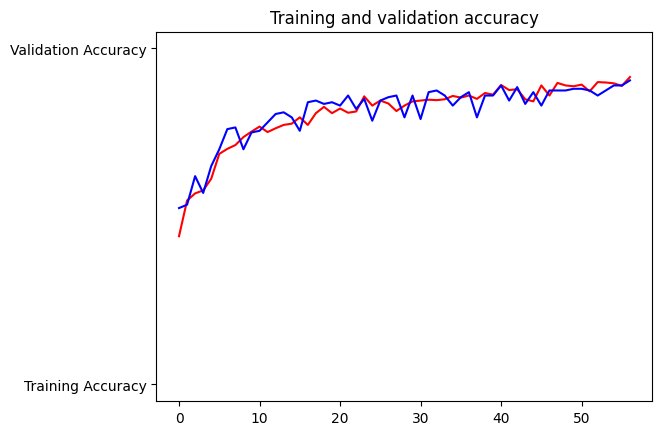

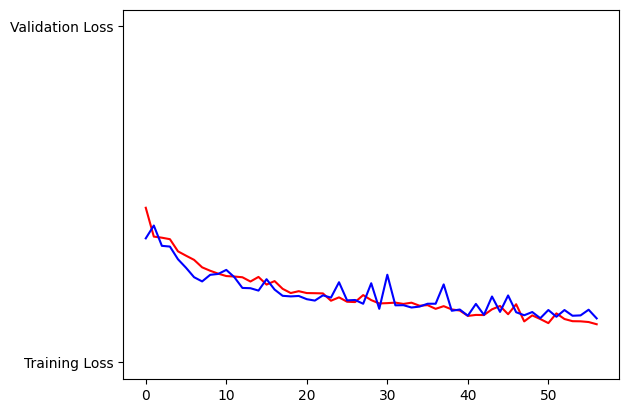

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

In [ ]:
## NOTE: If you are using Safari and this cell throws an error,
## please skip this block and run the next one instead.

import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = load_img(path, target_size=(150, 150))
  x = img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  #print(classes[0])

  classes_normalized = classes*1000

  classes_rounded = np.round(classes_normalized)
  #print(classes_rounded)

  classes_in_level = classes_rounded / 100
  #print(classes_in_level)

  classes_in_level_rounded = np.ceil(classes_in_level)
  classes_in_level_rounded_1d = classes_in_level_rounded.flatten()
  #print(classes_in_level_rounded.size)

  acnes_level = int(classes_in_level_rounded_1d[0])
  blackheads_level = int(classes_in_level_rounded_1d[1])
  darkspots_level = int(classes_in_level_rounded_1d[2])
  wrinkles_level = int(classes_in_level_rounded_1d[3])

  print('Acnes level      : ' + str(acnes_level))
  print('Blackheads level : ' + str(blackheads_level))
  print('Darkspots level  : ' + str(darkspots_level))
  print('Wrinkles level   : ' + str(wrinkles_level))

  categories = np.array(['acnes', 'blackheads', 'darkspots', 'wrinkles'])
  max_index = np.argmax(classes_in_level_rounded)
  max_category = categories[max_index]
  print(f"\nMost significant skin problem: " + str(max_category))





In [ ]:

# Save the model architecture in JSON format
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# Save the model weights in H5 format
model.save("skinmate-model.h5")
